In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

plt.style.use('ggplot')

In [ ]:
file_path = '/content/drive/MyDrive/WAI/salary/salary.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
df['workclass'] =  df['workclass'].replace(
    ['Self-emp-not-inc', 'Self-emp-inc'], 'Self-emp')
df['workclass'] =  df['workclass'].replace(
    ['Without-pay', 'Never-worked'], 'Without-pay')

In [ ]:
int_list = list(df[df['education'].str.contains('th')]['education'].unique())
int_list.append('Preschool')
df['education'] =  df['education'].replace(int_list , 'Low Education')

df['education'] =  df['education'].replace('HS-grad', 'Intermediate Education')

hg_list= list(set(df[df['education'].str.contains('-')]['education']))
df['education'] =  df['education'].replace(hg_list , 'Above Intermediate')

In [ ]:
df['marital-status'] =  df['marital-status'].replace(
    ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse' ] , 
    'Married')
df['marital-status'] =  df['marital-status'].replace(
    ['Divorced', 'Separated', 'Widowed' ] , 'Other')

In [ ]:
df['race'] =  df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo',
                                  'Other' ] , 'Other')

# Data Analysis

In [ ]:
my_colours = ['#4878d0', '#d65f5f', '#d5bb67', '#797979', 
              '#dc7ec0', '#ee854a', '#4DBEEE', '#A25746',
              '#312A72', '#5C2F6C', '#326E57', '#768528']

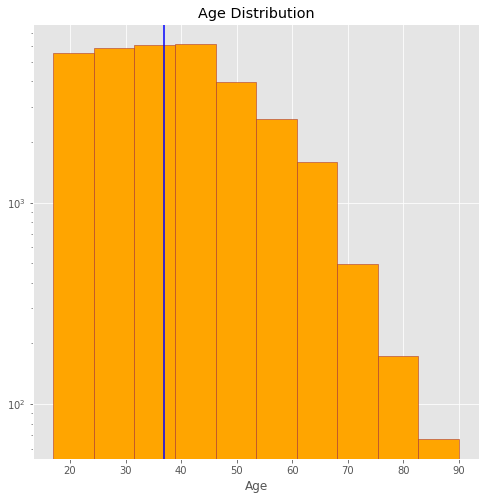

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df.age, color='orange', edgecolor='brown', log = True)
plt.axvline(df.age.median(), color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

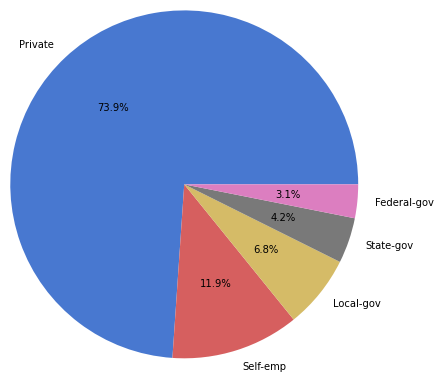

In [ ]:
df['workclass'].value_counts().head().plot(
    kind='pie', autopct='%.1f%%', radius=2, colors=my_colours)
plt.show()

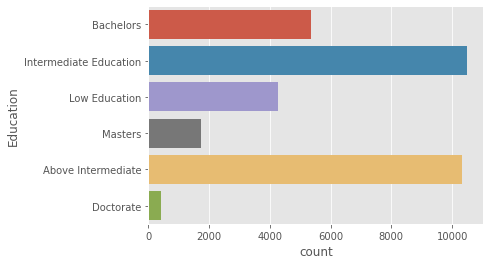

In [ ]:
sns.countplot(data=df, y='education')
plt.ylabel('Education')
plt.show()

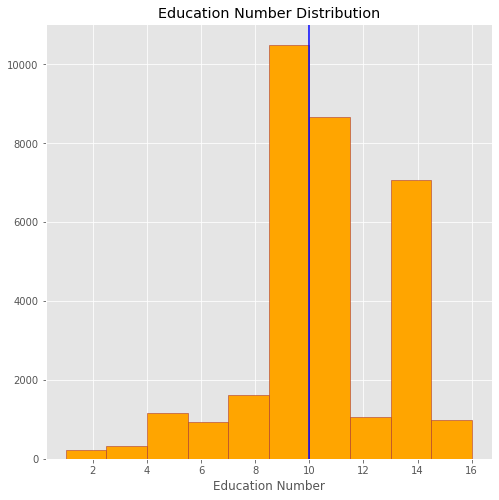

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df['education-num'], color='orange', edgecolor='brown')
plt.axvline(df['education-num'].median(), color='blue')
plt.title('Education Number Distribution')
plt.xlabel('Education Number')
plt.show()

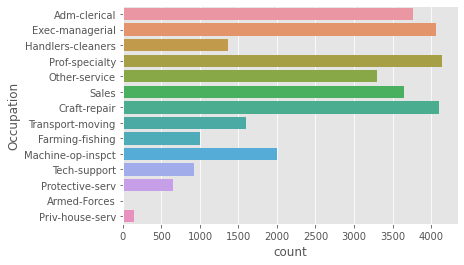

In [ ]:
sns.countplot(data=df, y='occupation')
plt.ylabel('Occupation')
plt.show()

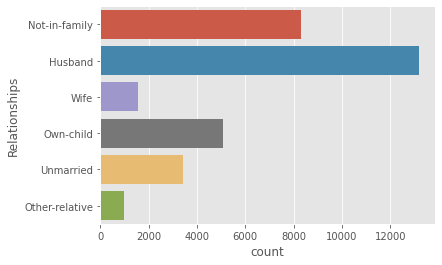

In [ ]:
sns.countplot(data=df, y='relationship')
plt.ylabel('Relationships')
plt.show()

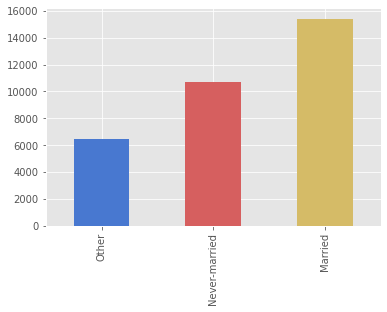

In [ ]:
df['marital-status'].value_counts().sort_values().plot(
    kind='bar', color=my_colours, width=0.5)
plt.show()

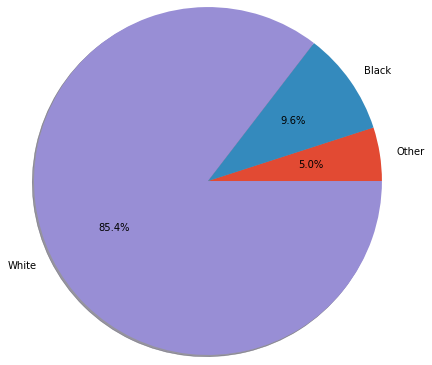

In [ ]:
df['race'].value_counts().sort_values().plot(
    kind='pie', autopct='%.1f%%', shadow=True, radius=2)
plt.show()

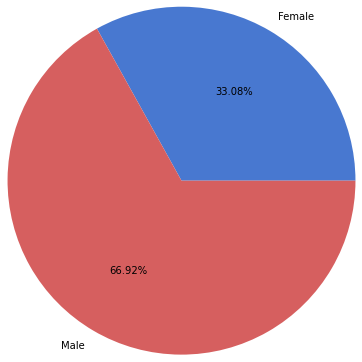

In [ ]:
df['sex'].value_counts().sort_values().plot(
    kind='pie', autopct='%.2f%%', colors=my_colours, radius=2)
plt.show()

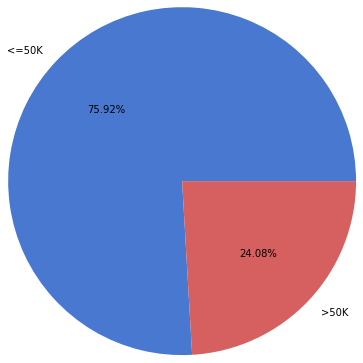

In [ ]:
df['salary'].value_counts().plot(
    kind='pie', autopct='%.2f%%', radius=2, colors=my_colours)
plt.show()

1. Czy starsze ludzie zarabiają więcej?

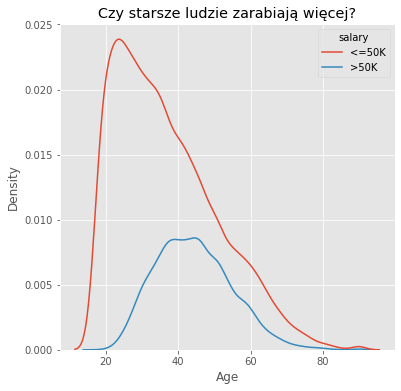

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Czy starsze ludzie zarabiają więcej?')
sns.kdeplot(data=df, x='age', hue='salary')
plt.xlabel('Age')
plt.show()

Wykres wskazuje na to, że osoby od 20 lat dopiero zaczynają zarabiać swoje pieniędzy, a w wieku 40-45 lat są na szczycie swoich zarobków.

2. Czy wyższe wykształcenie gwarantuje większe zarobki?

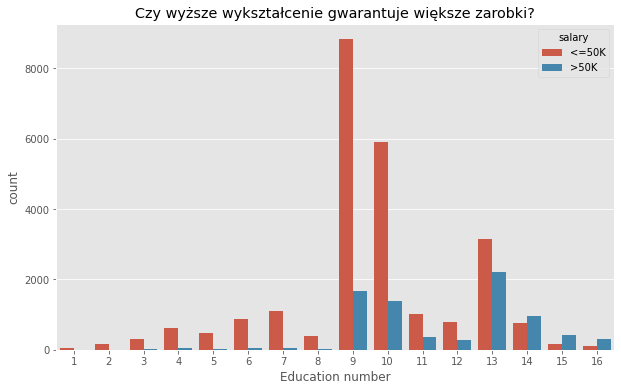

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Czy wyższe wykształcenie gwarantuje większe zarobki?')
sns.countplot(data=df, x='education-num', hue='salary')
plt.xlabel('Education number')
plt.show()

Według danych najwięcej osób zarabia powyżej 50k po licencjacie (education number '13').

3. Czy kobiety zarabiają mniej od męszczyzn z danym stopniem naukowym?

In [ ]:
df_mw=pd.get_dummies(df['salary'])
df_mw=pd.pivot_table(df_mw,  index=df['education-num'], 
                     columns=df['sex'], values=['<=50K' , '>50K'], 
                     aggfunc=np.sum).reset_index()
df_mw['>50K'] = (df_mw['>50K'] / (df_mw['>50K']+ df_mw['<=50K']))

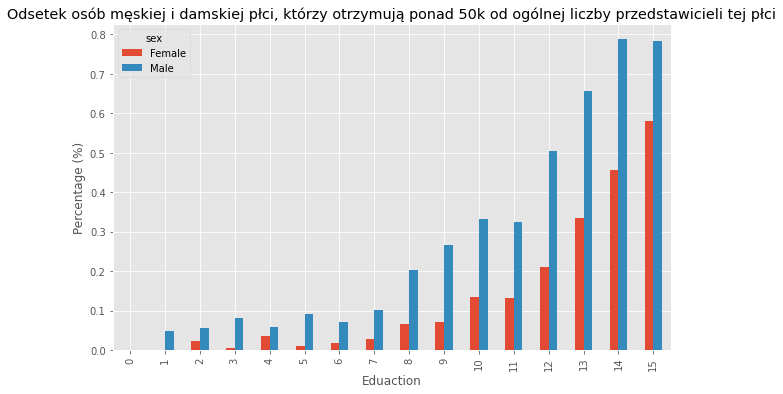

In [ ]:
df_mw['>50K'].plot(figsize=(10,6), kind='bar')
plt.title('Odsetek osób męskiej i damskiej płci, którzy otrzymują ponad 50k od ogólnej liczby przedstawicieli tej płci')
plt.xlabel('Eduaction')
plt.ylabel('Percentage (%)')
plt.show()

Dane wskazują na to, że męszczyźni zarabiają więcej w każdym z stopniu naukowym

4. Czy kobiety zarabiają mniej od męszczyzn w danym zawodzie?

In [ ]:
df_os=pd.get_dummies(df['salary'])
df_os=pd.pivot_table(df_os,  index=df['occupation'], 
                     columns=df['sex'], values=['<=50K' , '>50K'], 
                     aggfunc=np.sum)
df_os['>50K'] = (df_os['>50K'] / (df_os['>50K']+ df_os['<=50K']))

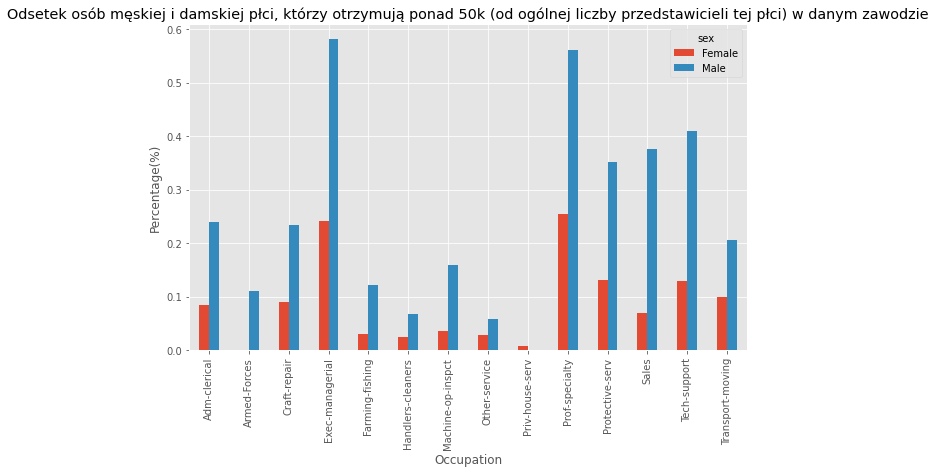

In [ ]:
df_os['>50K'].plot(figsize=(10,6), kind='bar')
plt.title('Odsetek osób męskiej i damskiej płci, którzy otrzymują ponad 50k (od ogólnej liczby przedstawicieli tej płci) w danym zawodzie')
plt.xlabel('Occupation')
plt.ylabel('Percentage(%)')
plt.show()

Wedłyg danych w tym zbiorze kobiety zarabiają więcej tylko w usługach sprzątających.

## Data processing

In [ ]:
def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [ ]:
def one_hot_field(dataset, field_name):
    field_one_hot = pd.get_dummies(
        df[field_name],prefix=f'{field_name}=', prefix_sep='')
    dataset = pd.concat([df, field_one_hot], axis=1)
    dataset = dataset.drop([field_name], axis=1)
    return dataset

In [ ]:
def binary_encode_field(dataset, field_name, new_name):
    unique_values = dataset[field_name].unique()
    replace_nums = {field_name: {unique_values[0]: 0, unique_values[1]: 1}}
    dataset = dataset.replace(replace_nums)
    dataset.columns = dataset.columns.str.replace(field_name, new_name)
    return dataset

In [ ]:
numerical_fields = ['age', 'fnlwgt', 'education-num', 'capital-gain',
                    'capital-loss', 'hours-per-week']
categorical_fields = ['workclass', 'education', 'marital-status', 'occupation',
                      'relationship', 'race', 'native-country']
binary_fields = ['sex', 'salary']
new_names = ['is_female', 'salary_greater_than_50k']

In [ ]:
for field in numerical_fields:
    df = normalize_field(df, field)

In [ ]:
for i, field in enumerate(binary_fields):
    df = binary_encode_field(df, field, new_names[i])

In [ ]:
for field in categorical_fields:
    df = one_hot_field(df, field)

In [ ]:
df

,age,fnlwgt,education-num,is_female,capital-gain,capital-loss,hours-per-week,salary_greater_than_50k,workclass=Federal-gov,workclass=Local-gov,...,native-country=Portugal,native-country=Puerto-Rico,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia
0,0.433333,0.052210,0.8125,0,0.021740,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.555556,0.056113,0.8125,0,0.000000,0.0,0.131313,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.422222,0.145245,0.5625,0,0.000000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.588889,0.158093,0.4375,0,0.000000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.311111,0.227930,0.8125,1,0.000000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.300000,0.173302,0.7500,1,0.000000,0.0,0.383838,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.444444,0.103976,0.5625,0,0.000000,0.0,0.404040,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.644444,0.102317,0.5625,1,0.000000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0.244444,0.135710,0.5625,0,0.000000,0.0,0.202020,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df[df.isnull().any(axis=1)]

,age,fnlwgt,education-num,is_female,capital-gain,capital-loss,hours-per-week,salary_greater_than_50k,workclass=Federal-gov,workclass=Local-gov,...,native-country=Portugal,native-country=Puerto-Rico,native-country=Scotland,native-country=South,native-country=Taiwan,native-country=Thailand,native-country=Trinadad&Tobago,native-country=United-States,native-country=Vietnam,native-country=Yugoslavia


In [ ]:
df = df.fillna(value=0)

In [ ]:
X = df.drop('salary_greater_than_50k', axis=1)
Y = df.loc[:,'salary_greater_than_50k']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
Y_test.shape

(6513,)

## Random Forest

In [ ]:
cls = RandomForestClassifier()
model = cls.fit(X_train, Y_train)

In [ ]:
def validate_model(x, y, cls):
  y_pred = cls.predict(x)
  acc = accuracy_score(y, y_pred)
  roc = roc_auc_score(y, y_pred)

  return (acc, roc)

In [ ]:
validate_model(X_test, Y_test, cls)

(0.8499923230462153, 0.7690345827049316)

In [ ]:
validate_model(X_train, Y_train, cls)

(0.9999232186732187, 0.9998402045381911)

In [ ]:
def train_model(max_depth, X_train, Y_train, X_test, Y_test):
  
  cls = RandomForestClassifier(max_depth=max_depth)
  cls.fit(X_train, Y_train)
  perf_train = validate_model(X_train, Y_train, cls)
  perf_test = validate_model(X_test, Y_test, cls)

  return perf_train, perf_test, cls

In [ ]:
results = []

for d in tqdm(range(2,30)):
  results.append((d, train_model(d, X_train, Y_train, X_test, Y_test)))

100%|██████████| 28/28 [01:17<00:00,  2.76s/it]


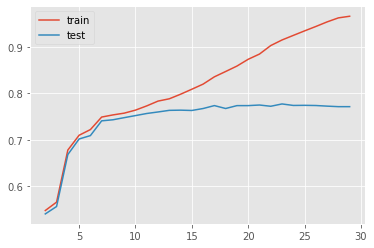

In [ ]:
plt.plot([x[0] for x in results], [x[1][0][1] for x in results], label='train')
plt.plot([x[0] for x in results], [x[1][1][1] for x in results], label='test')
plt.legend()
plt.show()

In [ ]:
best_model = results[27][1][2]
best_model

RandomForestClassifier(max_depth=29)

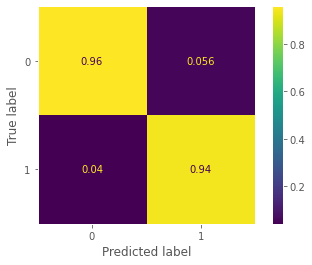

In [ ]:
y_pred = best_model.predict(X)

ConfusionMatrixDisplay.from_predictions(Y, y_pred, normalize='pred')
plt.grid(False)
plt.show()

Cross Validation Score

In [ ]:
cvs = cross_val_score(cls , X, Y, cv=5, scoring='accuracy')
print(f'CVS: {cvs}')
print(f'CVS Mean: {cvs.mean()}')
print(f'CVS Standard Deviation: {cvs.std()}')

CVS: [0.85137417 0.84551597 0.85165848 0.85687961 0.85304054]
CVS Mean: 0.8516937538644125
CVS Standard Deviation: 0.003659925907788639


K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
madel2 = knn.fit(X_train, Y_train)

In [ ]:
def validate_model2(x, y, knn):
  y_pred = knn.predict(x)
  acc = accuracy_score(y, y_pred)
  roc = roc_auc_score(y, y_pred)

  return (acc, roc)

In [ ]:
validate_model2(X_test, Y_test, knn)

(0.8265008444649163, 0.7438677172134457)

In [ ]:
validate_model2(X_train, Y_train, knn)

(0.8759213759213759, 0.8085860144492564)

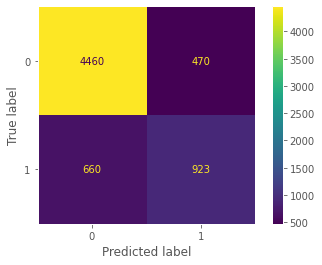

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Hyper-parameter

In [ ]:
accuracy=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    ac = accuracy_score(Y_test,y_pred)
    accuracy.append(ac)

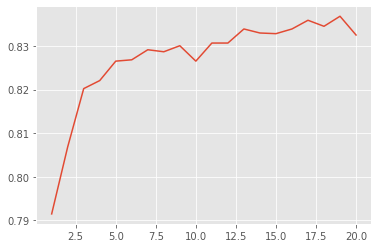

In [ ]:
plt.plot(range(1,21), accuracy)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [ ]:
validate_model2(X_test, Y_test, knn)

(0.8265008444649163, 0.7438677172134457)

In [ ]:
validate_model2(X_train, Y_train, knn)

(0.8759213759213759, 0.8085860144492564)

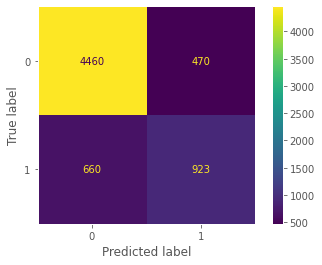

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Cross Validation Score

In [ ]:
cvs = cross_val_score(knn , X, Y, cv=5, scoring='accuracy')
print(f'CVS: {cvs}')
print(f'CVS Mean: {cvs.mean()}')
print(f'CVS Standard Deviation: {cvs.std()}')

CVS: [0.81974513 0.82324939 0.82202088 0.82693489 0.82585995]
CVS Mean: 0.8235620471398913
CVS Standard Deviation: 0.0025960839590945207


## TensorFlow

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(86,)),          
  tf.keras.layers.Dropout(0.2),                          
  tf.keras.layers.Dense(64, activation='relu',),                                    
  tf.keras.layers.Dense(32, activation='relu',),                                  
  tf.keras.layers.Dense(1, activation='sigmoid',)                                    
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='acc'),
              tf.keras.metrics.AUC(name='auc')]
              )

In [ ]:
training = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/50
1628/1628 [==============================] - 7s 4ms/step - loss: 0.3674 - acc: 0.8285 - auc: 0.8723 - val_loss: 0.3455 - val_acc: 0.8445 - val_auc: 0.8919
Epoch 2/50
1628/1628 [==============================] - 7s 4ms/step - loss: 0.3373 - acc: 0.8429 - auc: 0.8946 - val_loss: 0.3375 - val_acc: 0.8442 - val_auc: 0.8975
Epoch 3/50
1628/1628 [==============================] - 5s 3ms/step - loss: 0.3252 - acc: 0.8497 - auc: 0.9025 - val_loss: 0.3361 - val_acc: 0.8471 - val_auc: 0.8996
Epoch 4/50
1628/1628 [==============================] - 4s 2ms/step - loss: 0.3196 - acc: 0.8522 - auc: 0.9060 - val_loss: 0.3366 - val_acc: 0.8417 - val_auc: 0.8997
Epoch 5/50
1628/1628 [==============================] - 4s 2ms/step - loss: 0.3152 - acc: 0.8528 - auc: 0.9084 - val_loss: 0.3314 - val_acc: 0.8486 - val_auc: 0.9013
Epoch 6/50
1628/1628 [==============================] - 4s 2ms/step - loss: 0.3118 - acc: 0.8528 - auc: 0.9106 - val_loss: 0.3335 - val_acc: 0.8443 - val_auc: 0.9001
Epoc

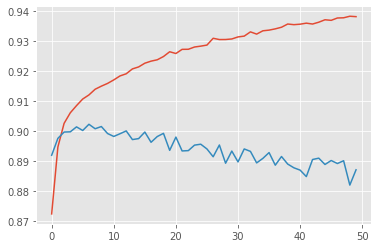

In [ ]:
plt.plot(training.history['auc'])
plt.plot(training.history['val_auc'])
plt.show()

In [ ]:
Y_predicted = model.predict(X_test)

In [ ]:
Y_predicted

array([[8.0021095e-01],
       [9.8937511e-01],
       [1.3518888e-01],
       ...,
       [1.4528632e-04],
       [3.1471163e-01],
       [1.7259684e-01]], dtype=float32)

In [ ]:
def validate_model(x, y, cls):
  y_pred = cls.predict(x)
  acc = accuracy_score(y, tf.round(y_pred))
  roc = roc_auc_score(y, y_pred)

  return (acc, roc)

In [ ]:
validate_model(X_test.to_numpy(), Y_test.to_numpy(), model)

(0.8473821587594043, 0.8885845936605848)

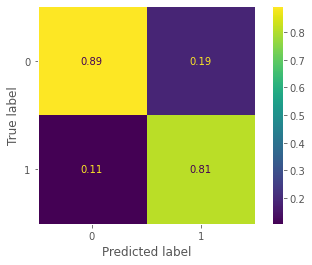

In [ ]:
y_pred = model.predict(X)

ConfusionMatrixDisplay.from_predictions(Y, tf.round(y_pred), normalize='pred')
plt.grid(False)
plt.show()